In [30]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

file_path = "Lab Session Data.xlsx"


xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name="Purchase data")
df_cleaned = df.iloc[:, :5]
df_cleaned.columns = ["Customer", "Candies", "Mangoes", "Milk Packets", "Payment"]
df_cleaned = df_cleaned.drop(columns=["Customer"])

A = df_cleaned.iloc[:, :-1].values
C = df_cleaned.iloc[:, -1].values

dimensionality = A.shape[1]
num_vectors = A.shape[0]
rank_A = np.linalg.matrix_rank(A)

A_pinv = np.linalg.pinv(A)
product_costs = A_pinv @ C

print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in this vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print(f"Cost of each product:")
print(f"  - Candy: ₹{product_costs[0]:.2f} per unit")
print(f"  - Mango: ₹{product_costs[1]:.2f} per kg")
print(f"  - Milk Packet: ₹{product_costs[2]:.2f} per unit")





Dimensionality of the vector space: 3
Number of vectors in this vector space: 10
Rank of Matrix A: 3
Cost of each product:
  - Candy: ₹1.00 per unit
  - Mango: ₹55.00 per kg
  - Milk Packet: ₹18.00 per unit


In [9]:
import pandas as pd
import numpy as np

file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name="Purchase data")
df_cleaned = df.iloc[:, :5]
df_cleaned.columns = ["Customer", "Candies", "Mangoes", "Milk Packets", "Payment"]
df_cleaned = df_cleaned.drop(columns=["Customer"])

A = df_cleaned.iloc[:, :-1].values
C = df_cleaned.iloc[:, -1].values

A_pinv = np.linalg.pinv(A)
X = A_pinv @ C

print("Model Vector X (Product Costs):")
print(f"  - Candy: ₹{X[0]:.2f} per unit")
print(f"  - Mango: ₹{X[1]:.2f} per kg")
print(f"  - Milk Packet: ₹{X[2]:.2f} per unit")


Model Vector X (Product Costs):
  - Candy: ₹1.00 per unit
  - Mango: ₹55.00 per kg
  - Milk Packet: ₹18.00 per unit


In [10]:
import pandas as pd

file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"

data = pd.read_excel(file_path, sheet_name="Purchase data")

data["Customer Type"] = ["RICH" if amount > 200 else "POOR" for amount in data["Payment (Rs)"]]

print(data[["Customer", "Customer Type"]])


  Customer Customer Type
0      C_1          RICH
1      C_2          RICH
2      C_3          RICH
3      C_4          POOR
4      C_5          RICH
5      C_6          POOR
6      C_7          RICH
7      C_8          RICH
8      C_9          POOR
9     C_10          POOR


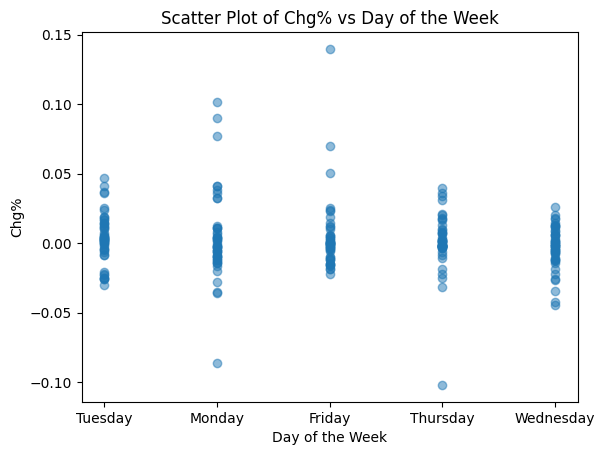

Mean Price: 1560.66
Variance of Price: 58732.37
Mean Price on Wednesdays: 1550.71
Mean Price in April: 1698.95
Probability of Making a Loss: 0.4980
Probability of Making a Profit on Wednesday: 0.4200
Conditional Probability of Profit Given Wednesday: 0.1694


In [11]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

data["Date"] = pd.to_datetime(data["Date"])
data["Day"] = data["Date"].dt.day_name()

price_data = data["Price"]  # Column D

mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

wednesday_prices = data[data["Day"] == "Wednesday"]["Price"]
mean_wednesday = statistics.mean(wednesday_prices)

april_prices = data[data["Date"].dt.month == 4]["Price"]
mean_april = statistics.mean(april_prices)

chg_percent = data["Chg%"]

prob_loss = sum(map(lambda x: x < 0, chg_percent)) / len(chg_percent)

wednesday_chg = data[data["Day"] == "Wednesday"]["Chg%"]
prob_profit_wednesday = sum(wednesday_chg > 0) / len(wednesday_chg)

prob_wednesday = len(wednesday_chg) / len(data)
prob_profit = sum(chg_percent > 0) / len(data)
prob_profit_given_wednesday = prob_profit_wednesday * prob_wednesday / prob_profit

plt.scatter(data["Day"], chg_percent, alpha=0.5)
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% vs Day of the Week")
plt.show()

print(f"Mean Price: {mean_price:.2f}")
print(f"Variance of Price: {variance_price:.2f}")
print(f"Mean Price on Wednesdays: {mean_wednesday:.2f}")
print(f"Mean Price in April: {mean_april:.2f}")
print(f"Probability of Making a Loss: {prob_loss:.4f}")
print(f"Probability of Making a Profit on Wednesday: {prob_profit_wednesday:.4f}")
print(f"Conditional Probability of Profit Given Wednesday: {prob_profit_given_wednesday:.4f}")


   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

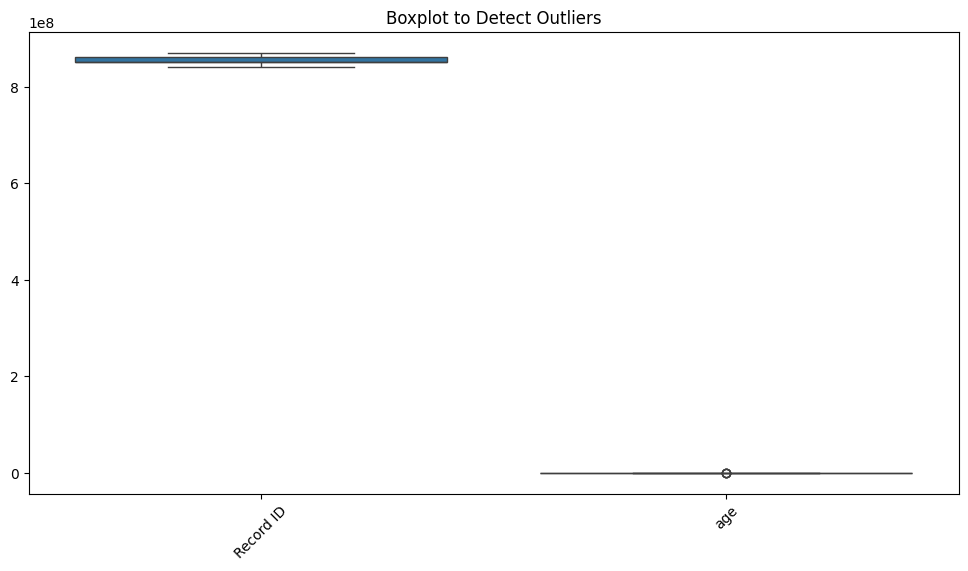


Mean of Numeric Variables:
 Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Standard Deviation of Numeric Variables:
 Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\rishi\\PycharmProjects\\ML code\\Lab Session Data.xlsx"

data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

print(data.head())

print("\nData Types of Each Column:\n", data.dtypes)

categorical_columns = data.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:\n", categorical_columns)

numerical_columns = data.select_dtypes(include=["number"]).columns
print("\nRange of Numeric Variables:\n", data[numerical_columns].agg(['min', 'max']))

missing_counts = data.isnull().sum()
print("\nMissing Values in Each Attribute:\n", missing_counts)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

numeric_means = data[numerical_columns].mean()
numeric_stddevs = data[numerical_columns].std()

print("\nMean of Numeric Variables:\n", numeric_means)
print("\nStandard Deviation of Numeric Variables:\n", numeric_stddevs)


In [20]:
import pandas as pd
import numpy as np

file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

numerical_columns = data.select_dtypes(include=["number"]).columns
categorical_columns = data.select_dtypes(include=["object"]).columns

for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        if (data[col].skew() > 1) or (data[col].skew() < -1):
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

numerical_columns = data.select_dtypes(include=["number"]).columns

scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Normalized Data:\n", data_normalized.head())



Normalized Data:
       Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?           

In [ ]:
8) Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
Use first vector for each document for this. Compare the values for JC and SMC and judge the 
appropriateness of each of them. 
    

In [29]:
import pandas as pd
import numpy as np


file_path = "Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")


binary_vectors = data.iloc[:2]


binary_columns = [
    col for col in data.columns
    if set(data[col].dropna().unique()).issubset({0, 1})
]


binary_data = binary_vectors[binary_columns]


vec1, vec2 = binary_data.iloc[0].values, binary_data.iloc[1].values

both_ones = np.sum((vec1 == 1) & (vec2 == 1))
both_zeros = np.sum((vec1 == 0) & (vec2 == 0))
mismatch_10 = np.sum((vec1 == 1) & (vec2 == 0))
mismatch_01 = np.sum((vec1 == 0) & (vec2 == 1))

total_elements = both_ones + both_zeros + mismatch_10 + mismatch_01


jaccard_coefficient = both_ones / (both_ones + mismatch_10 + mismatch_01) if (both_ones + mismatch_10 + mismatch_01) != 0 else 0
simple_matching_coefficient = (both_ones + both_zeros) / total_elements if total_elements != 0 else 0


print("\nBinary Attributes Considered:", binary_columns)
print("\nJaccard Coefficient:", round(jaccard_coefficient, 4))
print("Simple Matching Coefficient:", round(simple_matching_coefficient, 4))

if jaccard_coefficient < simple_matching_coefficient:
    print("\n SMC is higher than JC as it considers both 1-1 and 0-0 matches.")
    print(" JC is useful when we only care about feature presence (1s).")
else:
    print("\n JC and SMC values are close, indicating feature vector similarity.")


Binary Attributes Considered: []

Jaccard Coefficient: 0
Simple Matching Coefficient: 0

 JC and SMC values are close, indicating feature vector similarity.


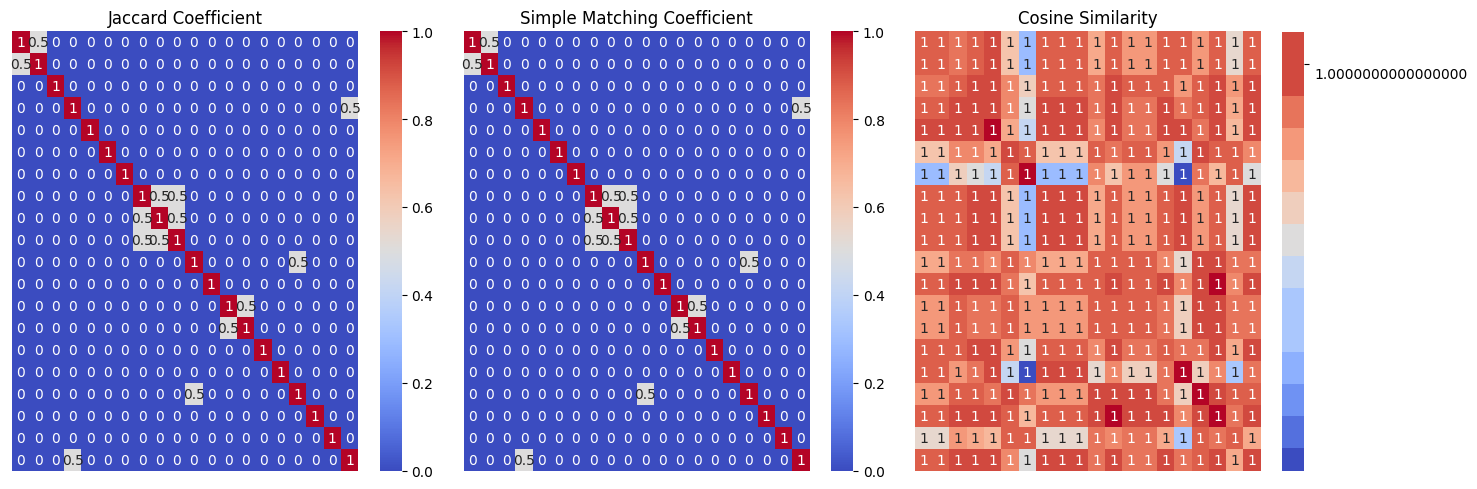

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Load the dataset
file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Select first 20 observations
subset_data = data.iloc[:20]

# Separate binary attributes
binary_data = subset_data.select_dtypes(include=["int", "bool"]).astype(int)

# Compute Jaccard Coefficient using pdist
jc_matrix = 1 - squareform(pdist(binary_data, metric="jaccard"))

# Compute Simple Matching Coefficient (SMC)
smc_matrix = np.zeros((len(binary_data), len(binary_data)))

for i in range(len(binary_data)):
    for j in range(len(binary_data)):
        matches = (binary_data.iloc[i] == binary_data.iloc[j]).sum()
        smc_matrix[i, j] = matches / len(binary_data.columns)

# Compute Cosine Similarity using numerical attributes
numerical_data = subset_data.select_dtypes(include=["number"])
cosine_sim_matrix = cosine_similarity(numerical_data)

# Heatmap Visualization
plt.figure(figsize=(15, 5))

# JC Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient")

# SMC Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient")

# Cosine Similarity Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(cosine_sim_matrix, annot=True, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
file_path = "C:\\Users\\rishi\\Downloads\\Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Selecting only numerical attributes
numerical_data = data.select_dtypes(include=["number"])

# Take the first two complete feature vectors
vector1 = numerical_data.iloc[0].values.reshape(1, -1)
vector2 = numerical_data.iloc[1].values.reshape(1, -1)

# Compute cosine similarity
cosine_sim = cosine_similarity(vector1, vector2)[0][0]

print(f"Cosine Similarity: {cosine_sim:.4f}")


Cosine Similarity: 1.0000
